In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [3]:
# get the data
query1 = '''SELECT f.title, f.rental_duration, f.rental_rate, f.length, f.rating, f.original_language_id, fc.category_id 
FROM film f
LEFT JOIN film_category fc
USING (film_id)
ORDER BY f.title;'''

data1 = pd.read_sql_query(query1, engine)
data1.head(50)

,title,rental_duration,rental_rate,length,rating,original_language_id,category_id
0,ACADEMY DINOSAUR,6,0.99,86,PG,None,6
1,ACE GOLDFINGER,3,4.99,48,G,None,11
2,ADAPTATION HOLES,7,2.99,50,NC-17,None,6
3,AFFAIR PREJUDICE,5,2.99,117,G,None,11
4,AFRICAN EGG,6,2.99,130,G,None,8
5,AGENT TRUMAN,3,2.99,169,PG,None,9
6,AIRPLANE SIERRA,6,4.99,62,PG-13,None,5
7,AIRPORT POLLOCK,6,4.99,54,R,None,11
8,ALABAMA DEVIL,3,2.99,114,PG-13,None,11
9,ALADDIN CALENDAR,6,4.99,63,NC-17,None,15


In [4]:
query2 = '''SELECT distinct f.title, r.rental_date
FROM film f
JOIN inventory i
USING (film_id)
JOIN rental r
USING (inventory_id)
WHERE EXTRACT(YEAR_MONTH FROM r.rental_date) = "200505";'''
data2 = pd.read_sql_query(query2, engine)
data2.head(50)

,title,rental_date
0,ACADEMY DINOSAUR,2005-05-30 20:21:07
1,ACADEMY DINOSAUR,2005-05-27 07:03:28
2,ADAPTATION HOLES,2005-05-31 04:50:07
3,AFFAIR PREJUDICE,2005-05-31 00:06:02
4,AFFAIR PREJUDICE,2005-05-27 20:44:36
5,AFRICAN EGG,2005-05-28 07:53:38
6,AGENT TRUMAN,2005-05-26 23:23:56
7,AGENT TRUMAN,2005-05-26 15:32:46
8,AIRPORT POLLOCK,2005-05-25 19:37:47
9,AIRPORT POLLOCK,2005-05-29 15:08:41


In [5]:
#droping duplicates
data2 = data2.drop_duplicates(subset='title', keep="first")
data2

,title,rental_date
0,ACADEMY DINOSAUR,2005-05-30 20:21:07
2,ADAPTATION HOLES,2005-05-31 04:50:07
3,AFFAIR PREJUDICE,2005-05-31 00:06:02
5,AFRICAN EGG,2005-05-28 07:53:38
6,AGENT TRUMAN,2005-05-26 23:23:56
...,...,...
1147,WYOMING STORM,2005-05-29 20:14:34
1149,YENTL IDAHO,2005-05-28 23:00:08
1151,ZHIVAGO CORE,2005-05-30 05:15:20
1152,ZOOLANDER FICTION,2005-05-30 05:01:30


In [6]:
data3 = pd.concat([data1, data2], axis=1)
data3

,title,rental_duration,rental_rate,length,rating,original_language_id,category_id,title,rental_date
0,ACADEMY DINOSAUR,6.0,0.99,86.0,PG,None,6.0,ACADEMY DINOSAUR,2005-05-30 20:21:07
1,ACE GOLDFINGER,3.0,4.99,48.0,G,None,11.0,NaN,NaT
2,ADAPTATION HOLES,7.0,2.99,50.0,NC-17,None,6.0,ADAPTATION HOLES,2005-05-31 04:50:07
3,AFFAIR PREJUDICE,5.0,2.99,117.0,G,None,11.0,AFFAIR PREJUDICE,2005-05-31 00:06:02
4,AFRICAN EGG,6.0,2.99,130.0,G,None,8.0,NaN,NaT
...,...,...,...,...,...,...,...,...,...
1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WYOMING STORM,2005-05-29 20:14:34
1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YENTL IDAHO,2005-05-28 23:00:08
1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZHIVAGO CORE,2005-05-30 05:15:20
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZOOLANDER FICTION,2005-05-30 05:01:30


In [7]:
# adding yes-no column 
import numpy as np
data1['May_rental'] = np.where(data1['title'].isin(data2['title']), 'Yes', 'No' )
data1

,title,rental_duration,rental_rate,length,rating,original_language_id,category_id,May_rental
0,ACADEMY DINOSAUR,6,0.99,86,PG,None,6,Yes
1,ACE GOLDFINGER,3,4.99,48,G,None,11,No
2,ADAPTATION HOLES,7,2.99,50,NC-17,None,6,Yes
3,AFFAIR PREJUDICE,5,2.99,117,G,None,11,Yes
4,AFRICAN EGG,6,2.99,130,G,None,8,Yes
...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,G,None,6,No
996,YOUTH KICK,4,0.99,179,NC-17,None,12,No
997,ZHIVAGO CORE,6,0.99,105,NC-17,None,11,Yes
998,ZOOLANDER FICTION,5,2.99,101,R,None,3,Yes


In [8]:
 #droping languge column as unnnecessary 
data1.drop("original_language_id", axis=1, inplace=True)
data1

,title,rental_duration,rental_rate,length,rating,category_id,May_rental
0,ACADEMY DINOSAUR,6,0.99,86,PG,6,Yes
1,ACE GOLDFINGER,3,4.99,48,G,11,No
2,ADAPTATION HOLES,7,2.99,50,NC-17,6,Yes
3,AFFAIR PREJUDICE,5,2.99,117,G,11,Yes
4,AFRICAN EGG,6,2.99,130,G,8,Yes
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,G,6,No
996,YOUTH KICK,4,0.99,179,NC-17,12,No
997,ZHIVAGO CORE,6,0.99,105,NC-17,11,Yes
998,ZOOLANDER FICTION,5,2.99,101,R,3,Yes


In [9]:
# creating a dataset for comparing later
Original_data = data1[['title','May_rental']]
Original_data

,title,May_rental
0,ACADEMY DINOSAUR,Yes
1,ACE GOLDFINGER,No
2,ADAPTATION HOLES,Yes
3,AFFAIR PREJUDICE,Yes
4,AFRICAN EGG,Yes
...,...,...
995,YOUNG LANGUAGE,No
996,YOUTH KICK,No
997,ZHIVAGO CORE,Yes
998,ZOOLANDER FICTION,Yes


In [10]:
#checking the datatypes
data1.dtypes

title               object
rental_duration      int64
rental_rate        float64
length               int64
rating              object
category_id          int64
May_rental          object
dtype: object

In [11]:
data1.isna().sum() # checking for NaNs

title              0
rental_duration    0
rental_rate        0
length             0
rating             0
category_id        0
May_rental         0
dtype: int64

In [12]:
data1.duplicated().sum() # checking for duplicates 

0

In [13]:
 #droping rating column as unnnecessary 
data1 = data1.drop(['rating'], axis = 1)
data1

,title,rental_duration,rental_rate,length,category_id,May_rental
0,ACADEMY DINOSAUR,6,0.99,86,6,Yes
1,ACE GOLDFINGER,3,4.99,48,11,No
2,ADAPTATION HOLES,7,2.99,50,6,Yes
3,AFFAIR PREJUDICE,5,2.99,117,11,Yes
4,AFRICAN EGG,6,2.99,130,8,Yes
...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,6,No
996,YOUTH KICK,4,0.99,179,12,No
997,ZHIVAGO CORE,6,0.99,105,11,Yes
998,ZOOLANDER FICTION,5,2.99,101,3,Yes


In [23]:
#Before checking for multicolinearity, we drop the title column so as not to overload the data, and turn category_id into a string
data1 = data1.drop('title', axis =1)

In [24]:
data1['category_id'] = data1['category_id'].astype('object')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ninav\AppData\Local\Temp\ipykernel_22412\2579259768.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data1.corr(method='pearson')


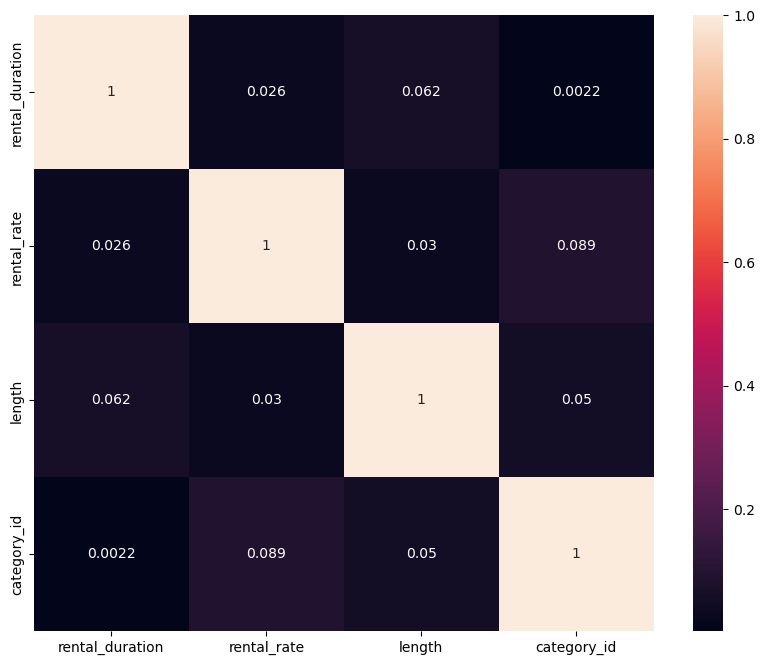

In [17]:
corr_matrix=data1.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

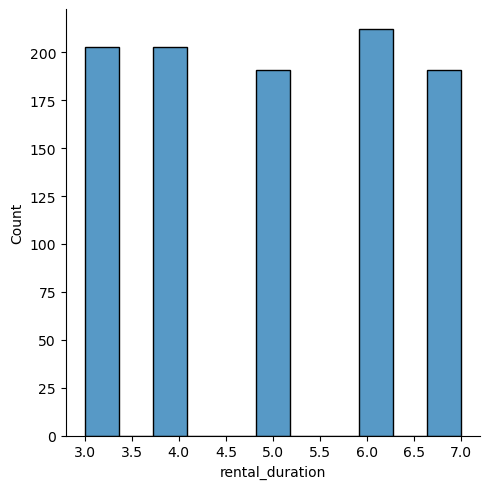

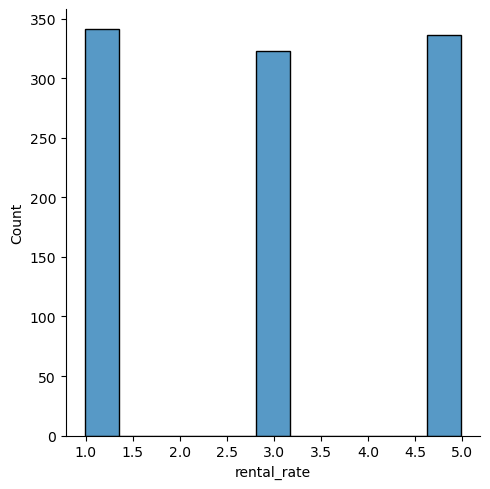

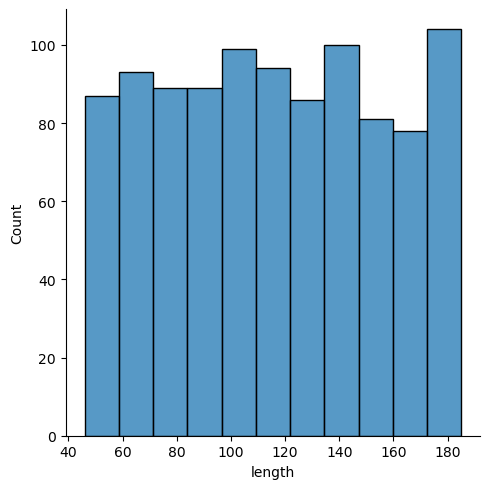

In [25]:
# looking at the scale and distribution of values

sns.displot(data1['rental_duration'])
plt.show()

sns.displot(data1['rental_rate'])
plt.show()

sns.displot(data1['length'])
plt.show()

In [26]:
# X/y split (feature/target) and train/test split 
y = data1['May_rental']
X = data1.drop('May_rental', axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [27]:
#Num/cat split and scaling
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

In [28]:
# Scaling and encoding training data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,rental_duration,rental_rate,length
0,0.50,1.0,0.769784
1,0.75,0.0,0.151079
2,0.00,0.5,0.258993
3,0.50,1.0,0.223022
4,0.25,0.0,0.733813
...,...,...,...
795,0.50,0.0,0.151079
796,0.00,0.0,0.683453
797,0.00,1.0,0.467626
798,0.50,1.0,0.906475


In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=cols)
X_cat_encode.head()

,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12,category_id_13,category_id_14,category_id_15,category_id_16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_train_transformed = np.concatenate([X_train_norm, X_cat_encode], axis=1)
X_train_transformed

array([[0.5       , 1.        , 0.76978417, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.        , 0.15107914, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.25899281, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.4676259 , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.90647482, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.31654676, ..., 0.        , 0.        ,
        0.        ]])

In [32]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [33]:
# Scaling and encoding test data
#Applying the previously traiend transformer on the test data (numerical).
X_test_num = X_test.select_dtypes(include = np.number)
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [34]:
#Encoding categoricals
X_test_cat = X_test.select_dtypes(include = object)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_encode.head()

,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12,category_id_13,category_id_14,category_id_15,category_id_16
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_test_transformed = np.concatenate([X_test_norm, X_test_encode], axis=1)

In [36]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.69

In [37]:
print(y_test.value_counts())

Yes    138
No      62
Name: May_rental, dtype: int64


In [38]:
pd.Series(predictions).value_counts()

Yes    198
No       2
dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  1,  61],
       [  1, 137]], dtype=int64)